<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz & Patika.dev Academy</font></h1></center> -->
<p align="center"><img src="https://i.im.ge/2021/09/11/TQ9Pvp.png" alt="TQ9Pvp.png" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/tr/9/9f/Eczac%C4%B1ba%C5%9F%C4%B1_spor_kul%C3%BCb%C3%BC_%28logo%29.jpg" alt="TQmmAq.jpg" width=70></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>110. VitrA Veri Bilimi Bootcamp </font></em></h1></center>
<center><h2><em><font color='darkorange'>September-2021</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project:</b></td>
        <td>Vitra - Pharma Sales Prediction - Product X </td>
    </tr>
    <tr>
        <td><b>Data Owner:</b></td>
        <td>Sercan Kara</td>
    </tr>
    <tr>
        <td><b>Group Members:</b></td>
        <td>Erkan Çetinyamaç</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Yağmur Uzun</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Arda Can Baysar</td>
  </tr>
  <tr>
        <td></td>
        <td>Eren Kaya</td>
  </tr>
    <tr>
        <td></td>
        <td>Melike Demirdağ</td>
  </tr>
</table>
</pre></td></tr></table></div>

# **Problem Description and Aim Of The Project**
Since predicting to feature sales holds crucial importance for a company, it is vital to build a model to predict next sale amounts in order to company can benefit from this critical intel. Therefore, our project group aims to build a model that can predict next sale amounts.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [3]:
df = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/DataPharma.xlsx')

In [4]:
df = df[df.Product != "PRODUCT_A"]
df = df[df.Product != "PRODUCT_C"]
df = df[df.Product != "PRODUCT_B"]
df = df[df.Product != "PRODUCT_V"]

In [5]:
df.Product.unique()

array(['PRODUCT_X'], dtype=object)

**Product X : Chronic: Urology, Patient group with a high average age.**

# **Data PreProcess & Feature Engineering**

**Adding external data,the inflation information monthly and annual from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Enflasyon+Verileri/Tuketici+Fiyatlari**

In [6]:
conInt = lambda x : int(x) 
df['Period'] = df['Period'].apply(conInt)
df['Period2'] = df['Period']

enf = pd.read_table('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Enf.txt')
#enf= pd.read_table("/content/Enf.txt")
enf.rename(columns={'Tarih ': 'Period','TUFE-(Yillik%Degisim)':'TUFE_Annual_Change', 'TUFE-(Aylik%Degisim)':'TUFE_Monthly_Change'},inplace=True)
def new_date(x):
  a=str(x)
  b=a[3:]+a[:2]
  return b
enf['Period'] = enf['Period'].apply(new_date)
enf['Period'] = enf['Period'].apply(conInt)

**Adding external data,the USD-TL currency monthly information   from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu**

In [7]:
df = pd.merge(df,enf,how='left',on='Period')
# https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu  USD-TL Curency - Source

kur = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Kur.xlsx')
#kur = pd.read_excel("/content/Kur.txt")
df = pd.merge(df,kur,how='left',on='Period')

In [8]:
typo = lambda x : 'ISTANBUL' if x == 'İSTANBUL' else x
df['Province'] = df['Province'].apply(typo)


df['Year'] = df['Year'].astype(np.int64)
df['Quantity'] = df['Quantity'].astype(np.int64)
df['Period2'] = df['Period2'].astype(np.int64)


df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df['Month'] = df.Period.dt.month

def seasonality(x):
  if x in(12,1,2):
    return "winter"
  elif x in (3,4,5):
    return "spring"
  elif x in(6,7,8):
    return "summer"
  else:
    return "autumn"
df["Season"]=df["Month"].apply(seasonality)

In [9]:
def region(x):
  if x in ['EDİRNE','KIRKLARELİ','TEKİRDAĞ','ISTANBUL','KOCAELİ','YALOVA','SAKARYA','BİLECİK','BURSA','BALIKESİR','ÇANAKKKALE']:
    return "Marmara"
  elif x in ['AKSARAY','ANKARA','ÇANKIRI','ESKİŞEHİR','KARAMAN','KIRIKKALE','KIRŞEHİR','KONYA','NEVŞEHİR','NİĞDE','SİVAS','YOZGAT','KAYSERİ']:
    return "İc_Anadolu"
  elif x in ['İZMİR','MANİSA','AYDIN','DENİZLİ','KÜTAHYA','AFYON','UŞAK','MUĞLA']:
    return "Ege"
  elif x in ['ADANA','OSMANİYE','ANTALYA','BURDUR','HATAY','ISPARTA','İÇEL','KAHRAMANMARAŞ']:
    return "Akdeniz"
  elif x in ['RİZE','TRABZON','ARTVİN','SİNOP','TOKAT','ÇORUM','AMASYA','SAMSUN','ZONGULDAK','BOLU','DÜZCE','KARABÜK','BARTIN','KASTAMONU','BAYBURT','GİRESUN','GÜMÜŞHANE','ORDU']:
    return "Karadeniz"
  elif x in ['AĞRI','ARDAHAN','BINGOL','BITLIS','ELAZIĞ','ERZİNCAN','ERZURUM','HAKKARİ','IĞDIR','KARS','MALATYA','MUŞ','TUNCELİ','VAN','ŞIRNAK']:
    return "Dogu_Anadolu"
  elif x in ['ADIYAMAN','BATMAN','DİYARBAKIR','GAZİANTEP','KİLİS','MARDIN','SİİRT','ŞANLIURFA']:
    return "Guneydogu_Anadolu"
  else:
    return np.nan

df["Region"]=df["Province"].apply(region)


Is_Metropol = lambda x : 1 if x in ['ANKARA','İZMİR','ISTANBUL','BURSA','ANTALYA','ADANA','İÇEL','AYDIN','SAMSUN','MANİSA'] else 0
df["Metropol"] = df['Province'].apply(Is_Metropol)


df["Product"]=df["Product"].str.split("_",expand=True)[1]

# def TotalAmountQuantityDistribution(x):
#   if x == 'B':
#     return 5
#   elif x == "X":
#     return 4
#   elif x == "A":
#     return 3
#   elif x == "C":
#     return 2
#   else:
#     return 1
# df['Total_Sale_Amount'] = df['Product'].apply(TotalAmountQuantityDistribution)

In [10]:
df.sort_values(by="Period",ascending=True,inplace = True)

productt = df.Product.unique()
provinces= df.Province.unique()

for prod in productt:
  for provinc in provinces:
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M1']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(1)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M2']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(2)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M3']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(3)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M6']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(6)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M9']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(9)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M12']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(12)

In [11]:
df.Quantity.skew(),df.Quantity.kurtosis()

(3.0345099724661946, 12.751868413530072)

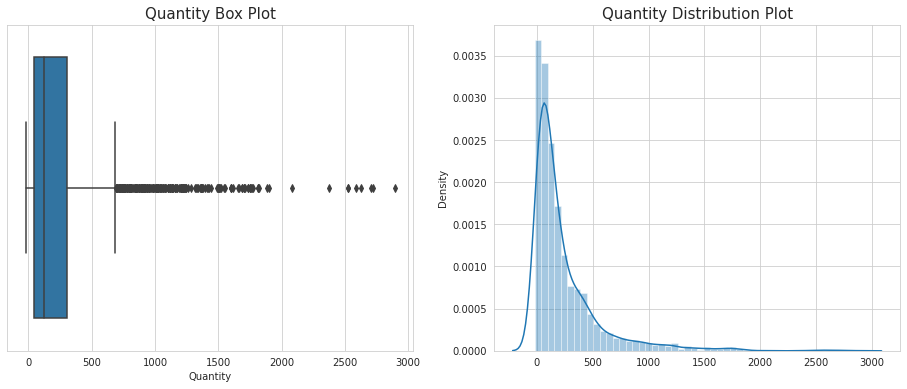

In [12]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Quantity",data=df)
plt.title('Quantity Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df["Quantity"])
plt.title('Quantity Distribution Plot', fontsize=15)

plt.show() #quantity's distribution before outlier handling and log transform

In [13]:
df.Quantity.describe()

count    2920.000000
mean      238.645548
std       322.918220
min       -22.000000
25%        43.000000
50%       124.000000
75%       301.000000
max      2893.000000
Name: Quantity, dtype: float64

In [14]:
df.shape

(2920, 19)

# **Outlier Handling**

In [15]:
#Outlier handling
df = df[df['Quantity'] > 0] #refund

Q1 = df.Quantity.quantile(0.25)
Q3 = df.Quantity.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df= remove_outlier(df,'Quantity')

Anything outside this range is an outlier: ( -343.0 , 689.0 )


In [16]:
df.shape

(2685, 19)

In [17]:
df.Quantity.describe()

count    2685.000000
mean      164.132216
std       158.231553
min         1.000000
25%        40.000000
50%       110.000000
75%       236.000000
max       686.000000
Name: Quantity, dtype: float64

In [18]:
df['Quantity'] = np.log10(df['Quantity']) # since target quantity is highly skewed, appylinglog10 transform to the target.

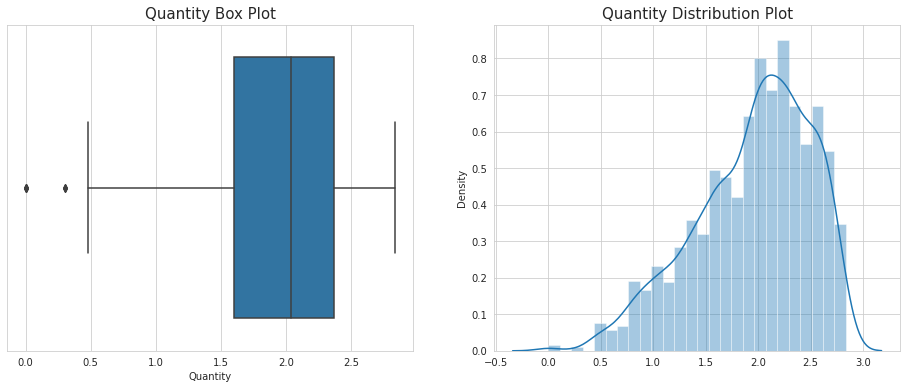

In [19]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Quantity",data=df)
plt.title('Quantity Box Plot', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(x=df["Quantity"])
plt.title('Quantity Distribution Plot', fontsize=15)

plt.show()

In [20]:
df.Quantity.skew(),df.Quantity.kurtosis() #quantity distribution after outlier handling and log transform

(-0.6524044382657258, -0.12319826572431758)

In [21]:
df.tail(3)

,Year,Period,Product,Province,Quantity,Period2,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Region,Metropol,Quantity_M1,Quantity_M2,Quantity_M3,Quantity_M6,Quantity_M9,Quantity_M12
2416,2019,2019-12-01,X,MUŞ,1.880814,201912,11.84,0.74,5.84815,12,winter,Dogu_Anadolu,0,86.0,83.0,28.0,76.0,93.0,92.0
2585,2019,2019-12-01,X,YOZGAT,2.702431,201912,11.84,0.74,5.84815,12,winter,İc_Anadolu,0,192.0,327.0,6.0,144.0,268.0,350.0
2919,2019,2019-12-01,X,YALOVA,1.886491,201912,11.84,0.74,5.84815,12,winter,Marmara,0,64.0,77.0,14.0,40.0,26.0,10.0


# **Model Building**

In [22]:
# # ----------- Train - Test Split wrt  the date -------------------

# df.fillna(df.mean(),inplace=True)
# from sklearn.model_selection import train_test_split

# #Dummy encoding Region and Season categorical features and concat. them with numerical features.
# df2 = pd.concat([pd.get_dummies(df[["Region","Season"]],drop_first=True),df[['Quantity',"USD-TL",'Quantity_M3','Quantity_M6',"Quantity_M9","Quantity_M12","Metropol","TUFE_Annual_Change","TUFE_Monthly_Change"]]],axis=1)

# train, test = train_test_split(df2, test_size=0.3, shuffle=False)

# X_train = train.drop(columns=['Quantity'])
# y_train = train['Quantity']
# X_test = test.drop(columns=['Quantity'])
# y_test = test['Quantity']

# R^2: 0.35360785624978075
# Adjusted R^2: 0.3396628480724283
# MAE: 76.75286658762703
# MAPE: 220.72797695858793
# MSE: 17623.724573373034
# RMSE: 132.75437685203843
# CoV: 0.8114730715593398

In [23]:
df.fillna(df.mean(),inplace=True)


#'CDS_Change','CDS_Min','CDS_Max', ,'Quantity_M2','Quantity_M1'

#Dummy encoding Region and Season categorical features and concat. them with numerical features.
X = pd.concat([pd.get_dummies(df[["Region","Season"]],drop_first=True),df[["USD-TL",'Quantity_M3','Quantity_M6',"Quantity_M9","Quantity_M12","Metropol","TUFE_Annual_Change","TUFE_Monthly_Change"]]],axis=1)
y = df['Quantity']
X.head()

#train - test split


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

**XGBoost**

In [24]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

XGBMODEL = XGBRegressor(max_depth=4, min_child_weight=0.05)
XGBMODEL.fit(X_train, y_train)
pred = XGBMODEL.predict(X_test)

#inverse log transform
pred2 = 10**pred
y_test2 = 10**y_test

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

print("R^2:",metrics.r2_score(y_test2, pred2))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test2, pred2))*(len(y_test2)-1)/(len(y_test2)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test2, pred2))
print("MAPE:",mape(y_test2,pred2))
print("MSE:",metrics.mean_squared_error(y_test2, pred2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test2, pred2)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test2, pred2))) / y_test2.mean()) #CoV=RMSE/mean(target)

[17:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2: 0.7957914655612399
Adjusted R^2: 0.7913859514933986
MAE: 41.763808411344996
MAPE: 56.84316384857997
MSE: 4963.456321706428
RMSE: 70.4518014085263
CoV: 0.43363562864376354


In [25]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test2,  pred2)

0.800705923714006

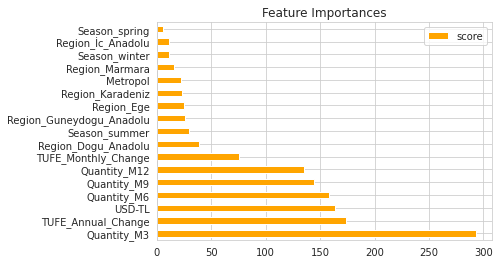

In [26]:
feature_important = XGBMODEL.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',title='Feature Importances',color= 'orange')

**XGBoost GridSearchCV -- Model Tuning**

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

# xgb_grid={"learning_rate": (0.05, 0.10, 0.15),
#                         "max_depth": [ 3, 4, 5, 6, 8],
#                         "min_child_weight": [ 1, 3, 5, 7],
#                         "gamma":[ 0.0, 0.1, 0.3],
#                         "colsample_bytree":[ 0.3,0.4,0.7],
#             }

# xgb = XGBRegressor()

# xgb_cv = GridSearchCV(xgb, 
#                       param_grid = xgb_grid, 
#                       cv = 4, 
#                       n_jobs = -1,
#                       verbose = 2)


# xgb_cv.fit(X_train, y_train)




In [28]:
# xgb_cv.best_params_

**xgb_cv.best_params_{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 6,
 'min_child_weight': 5}**

In [29]:
#hyperparameter tuned model building
xgb_tuned = XGBRegressor(colsample_bytree = 0.7, 
                         gamma = 0.1,
                         learning_rate = 0.15, 
                         max_depth = 6, 
                         max_child_weigth = 5) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)


pred3 = xgb_tuned.predict(X_test)
y_test3 = 10**y_test #inverse log transform
pred3 = 10**pred3

[17:15:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [30]:
print("R^2:",metrics.r2_score(y_test3, pred3))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test3, pred3))*(len(y_test3)-1)/(len(y_test3)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test3, pred3))
print("MAPE:",mape(y_test3,pred3))
print("MSE:",metrics.mean_squared_error(y_test3, pred3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test3, pred3)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test3, pred3))) / y_test3.mean()) #CoV=RMSE/mean(target)
print("Explanied Variance:",explained_variance_score(y_test3,  pred3))

R^2: 0.7981713591341923
Adjusted R^2: 0.793817187948001
MAE: 42.14238782674444
MAPE: 59.244985227144
MSE: 4905.611051761543
RMSE: 70.04006747399336
CoV: 0.4311013782773343
Explanied Variance: 0.8035534345004105


**CatBoost**

In [31]:
%%capture
!pip install catboost;
from catboost import CatBoostRegressor;


catb = CatBoostRegressor();
catb_model = catb.fit(X_train, y_train);


pred4 = catb_model.predict(X_test);
pred4 = 10**pred4; #inverse log transform
y_test4 = 10**y_test;



In [32]:
print("R^2:",(metrics.r2_score(y_test4, pred4)))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test4, pred4))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test4, pred4))
print("MAPE:",mape(y_test4,pred4))
print("MSE:",metrics.mean_squared_error(y_test4, pred4))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred4)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test4, pred4))) / y_test4.mean()) #CoV=RMSE/mean(target)
print("Explanied Variance:",explained_variance_score(y_test4,  pred4))

R^2: 0.8092603874591738
Adjusted R^2: 0.805145446579486
MAE: 40.03615712946889
MAPE: 55.730139578640916
MSE: 4636.0831013627985
RMSE: 68.08878836756311
CoV: 0.4190911226833032
Explanied Variance: 0.813917661167903


**CatBoost GridSearchCV - Model Tuning**

In [33]:
# catb_grid = {
#     'iterations': [300,1000,2000],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [3,5,7,8] }
# catb = CatBoostRegressor()
# catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

# catb_cv_model.fit(X_train, y_train)



In [34]:
# catb_cv_model.best_params_

**CatBoost Best Parameters: {'depth': 7, 'iterations': 1000, 'learning_rate': 0.05}**

In [35]:
# catboost tuned model building
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.05, 
                               depth =7
                               )


catb_tuned = catb_tuned.fit(X_train,y_train)

pred5 = catb_tuned.predict(X_test)
pred5=10**pred5 #inverse log transform

In [36]:
print("R^2:",(metrics.r2_score(y_test4, pred5)))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test4, pred5))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test4, pred5))
print("MAPE:",mape(y_test4,pred5))
print("MSE:",metrics.mean_squared_error(y_test4, pred5))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred5)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test4, pred5))) / y_test4.mean()) #CoV=RMSE/mean(target)
print("Explanied Variance:",explained_variance_score(y_test4,  pred5))

R^2: 0.8031035619212876
Adjusted R^2: 0.7988557961251732
MAE: 41.09194820597435
MAPE: 57.78843473468407
MSE: 4785.72980795933
RMSE: 69.1789694051547
CoV: 0.4258012611058862
Explanied Variance: 0.8080803980996205


**GBM**

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
pred6 = gbm_model.predict(X_test)
pred6 = 10**pred6 #inverse log transform

print("R^2:",metrics.r2_score(y_test4, pred6))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test4, pred6))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test4, pred6))
print("MAPE:",mape(y_test4,pred6))
print("MSE:",metrics.mean_squared_error(y_test4, pred6))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred6)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test4, pred6))) / y_test4.mean()) #CoV=RMSE/mean(target)
print("Explanied Variance:",explained_variance_score(y_test4,  pred6))

R^2: 0.7963657855877377
Adjusted R^2: 0.7919726616727524
MAE: 41.98460656100878
MAPE: 61.6843187488341
MSE: 4949.497001279213
RMSE: 70.35266165028308
CoV: 0.4330254166899187
Explanied Variance: 0.8018715629415026


**GBM GridSearchCV -- Model Tuning**

In [38]:
# gbm_params = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 8,50,100],
#     'n_estimators': [200, 500, 1000],
#     'subsample': [1,0.5,0.75],
# }

In [39]:
# gbm = GradientBoostingRegressor()
# gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 4, n_jobs = -1, verbose = 2)
# gbm_cv_model.fit(X_train, y_train)

In [40]:
# gbm_cv_model.best_params_

**GBM Best Model Parameters:{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}**

In [41]:
#GBM tuned model building
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

pred7 = gbm_tuned.predict(X_test)
pred7=10**pred7 #inverse log transform

print("R^2:",metrics.r2_score(y_test4, pred7))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test4, pred7))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test4, pred7))
print("MAPE:",mape(y_test4,pred7))
print("MSE:",metrics.mean_squared_error(y_test4, pred7))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test4, pred7)))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test4, pred7))) / y_test4.mean()) 
print("Explanied Variance:",explained_variance_score(y_test4,  pred7))

R^2: 0.8006390323791674
Adjusted R^2: 0.7963380977985149
MAE: 41.74754787296225
MAPE: 59.22611995130388
MSE: 4845.632224719178
RMSE: 69.61057552354511
CoV: 0.4284578261153377
Explanied Variance: 0.8044498527414633


# **Hyperparameter Tuned Model Performance Comparision**

In [42]:
RegModelsTuned={"CastBoost":[round(metrics.r2_score(y_test4, pred5),2), round(1 - (1-metrics.r2_score(y_test4, pred5))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1),2),
         round(metrics.mean_absolute_error(y_test4, pred5),2),round(metrics.mean_squared_error(y_test4, pred5),2),round(np.sqrt(metrics.mean_squared_error(y_test4, pred5)),2)
         ,round(mape(y_test4,pred5),2)
         ,round((np.sqrt(metrics.mean_squared_error(y_test4, pred5))) / y_test4.mean(),2),round(explained_variance_score(y_test4,  pred5),2)],

         "XGBoost":[round(metrics.r2_score(y_test4, pred3),2), round(1 - (1-metrics.r2_score(y_test4, pred3))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1),2),
         round(metrics.mean_absolute_error(y_test4, pred3),2),round(metrics.mean_squared_error(y_test4, pred3),2),round(np.sqrt(metrics.mean_squared_error(y_test4, pred3)),2)
         ,round(mape(y_test4,pred3),2)
         ,round((np.sqrt(metrics.mean_squared_error(y_test4, pred3))) / y_test4.mean(),2),round(explained_variance_score(y_test4,  pred3),2)],


         "GBM":[round(metrics.r2_score(y_test4, pred7),2), round(1 - (1-metrics.r2_score(y_test4, pred7))*(len(y_test4)-1)/(len(y_test4)-X_test.shape[1]-1),2),
         round(metrics.mean_absolute_error(y_test4, pred7),2),round(metrics.mean_squared_error(y_test4, pred7),2),round(np.sqrt(metrics.mean_squared_error(y_test4, pred7)),2)
         ,round(mape(y_test4,pred7),2)
         ,round((np.sqrt(metrics.mean_squared_error(y_test4, pred7))) / y_test4.mean(),2),round(explained_variance_score(y_test4,  pred7),2)]
         }


indexR=["R^2:","Adjusted R^2:","MAE:","MSE:","RMSE:","MAPE:","CoV:","Explained Variance:"]
df_models_tuned=pd.DataFrame(RegModelsTuned,index=indexR)
df_models_tuned

,CastBoost,XGBoost,GBM
R^2:,0.80,0.80,0.80
Adjusted R^2:,0.80,0.79,0.80
MAE:,41.09,42.14,41.75
MSE:,4785.73,4905.61,4845.63
RMSE:,69.18,70.04,69.61
MAPE:,57.79,59.24,59.23
CoV:,0.43,0.43,0.43
Explained Variance:,0.81,0.80,0.80


# **Conclusion**

For each type of product several ML models has been tried. The best result is obtained with Product X with CatBoost Regressor. The reason might be the data that given to the models contain mostly categorical variables and since CatBoost is a model that performs better with categorical features, the results are as expected. Lastly, the models for other products did not return satisfactory result.